importing Jupyter notebook from rutgers_socreward.ipynb


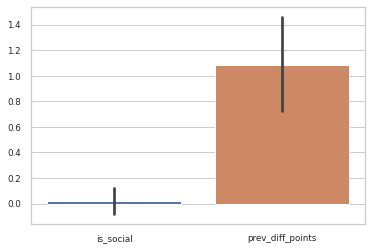

In [1]:
import pandas as pd
import numpy
import itertools
from utility import *
import import_ipynb
from rutgers_socreward import Subject, subject_list

In [2]:
#list of columns for making BIDS tsv file 
subset = ['deckchoice',
          'choice_onset',
          "press1_onset",
          "info_onset",
          "partner_onset",
          "press2_onset",
          'is_social', 
          'aff_feedback_prev_social', 
          'aff_feedback_prev_nonsocial',
          "aff_onset",
          "duration",
          'prev_diff_points',
          "RT1",
          "RT2", 
          'aff_feedback_curr',
          "lapse1",
          "lapse2"
]

#### Onset Type, Description : Duration

- choice_onset, Choose star or pentagon: RT1 or 3s 
- info_onset, Reveal choice value: 1.5s 
- partner-onset, Reveal Partner Choice: RT2 or 3s
- aff_onset,  Affective feedback win or lose: 1.5s

In [3]:
def generate_ev(sub, write = False):
    nan = 'n/a'
    for i in Subject(sub).matfiles:
        sub = sub
        run = Subject(sub).matfiles.index(i) + 1
        trial_dfs = []
        df = convert_mat(i)



        for index, row in df.iterrows():
            trial_df = pd.DataFrame()
            onset = []
            duration = []
            trial_type = []
            RT1 = []
            RT2 = []
            points = []


            if row.partner == 1:
                is_social = 'social'
            else:
                is_social = 'non_social'

            if row.deckchoice == 0:
                choice = 'choice_star'
            else:
                choice = 'choice_pentagon'

            if row.lapse1 == 1 or row.lapse2 == 1:
                lapse = '_lapse'
                dur_choice = dur_partner = 3
            else:
                lapse = ''
                dur_choice = row.RT1 
                dur_partner = row.RT2



            if row.deckchoice == 11 or row.deckchoice == 22:
                catch = '_catch'
                row.choice_onset = 'n/a'
                dur_choice = 'n/a'

            else:
                catch = ''


            #choice
            onset.append(row.choice_onset)
            duration.append(dur_choice)
            trial_type.append(f'partner-{is_social}_choice-{choice}{lapse}{catch}')
            RT1.append(row.RT1)
            RT2.append('n/a')
            points.append('n/a')

            
            #info
            onset.append(row.info_onset)
            duration.append(1.5)
            trial_type.append(f'partner-{is_social}_feedback-informative{lapse}{catch}')
            RT1.append('n/a')
            RT2.append('n/a')
            points.append(row.Npoints)


            #partner
            onset.append(row.partner_onset)
            duration.append(dur_partner)
            trial_type.append(f'partner-{is_social}_feedback-partner{lapse}{catch}')
            RT1.append('n/a')
            RT2.append(row.RT2)
            points.append('n/a')


            #aff
            onset.append(row.aff_onset)
            duration.append(1.5)
            trial_type.append(f'partner-{is_social}_feedback-affective{lapse}{catch}')
            RT1.append('n/a')
            RT2.append('n/a')
            points.append('n/a')


            trial_df['onset'] = onset
            trial_df['duration'] = duration
            trial_df['trial_type'] = trial_type
            trial_df['choice_RT'] = RT1
            trial_df['partner_RT'] = RT2
            trial_df['points'] = points


            trial_dfs.append(trial_df)

        bids_tsv = pd.concat(trial_dfs).reset_index()
        file_name = f'EVfiles/sub-{sub}_task-socreward_run-{run}_events.tsv'
        bids_tsv.to_csv(file_name, index = False)

    

In [4]:
for sub in subject_list:
    generate_ev(sub)

In [5]:
#fix index column

dfs = glob.glob('EVfiles/*.tsv')

for i in dfs:
    df = pd.read_csv(i, index_col=False)
    df['trialn'] = range(1, len(df) + 1)
    print(df.iloc[:, 1:])
    df.to_csv(i, index = False)
    
    
    
    

          onset  duration                                   trial_type  \
0      4.816692  1.285837        partner-social_choice-choice_pentagon   
1      9.784389  1.500000          partner-social_feedback-informative   
2      0.000000  0.000000              partner-social_feedback-partner   
3      0.000000  1.500000            partner-social_feedback-affective   
4     22.332338  0.479372    partner-non_social_choice-choice_pentagon   
..          ...       ...                                          ...   
155    0.000000  1.500000  partner-non_social_feedback-affective_lapse   
156  765.858623  3.000000      partner-social_choice-choice_star_lapse   
157    0.000000  1.500000    partner-social_feedback-informative_lapse   
158    0.000000  3.000000        partner-social_feedback-partner_lapse   
159    0.000000  1.500000      partner-social_feedback-affective_lapse   

     choice_RT  partner_RT  points  trialn  
0     1.285837         NaN     NaN       1  
1          NaN       

          onset  duration                                 trial_type  \
0      4.783027  0.662328  partner-non_social_choice-choice_pentagon   
1      9.032863  1.500000    partner-non_social_feedback-informative   
2     12.265592  1.479652        partner-non_social_feedback-partner   
3     18.015532  1.500000      partner-non_social_feedback-affective   
4     22.282502  0.522569      partner-social_choice-choice_pentagon   
..          ...       ...                                        ...   
155    0.000000  1.500000      partner-non_social_feedback-affective   
156  757.808897  0.563786      partner-social_choice-choice_pentagon   
157  765.058837  1.500000        partner-social_feedback-informative   
158  771.291432  2.329619            partner-social_feedback-partner   
159  779.041244  1.500000          partner-social_feedback-affective   

     choice_RT  partner_RT  points  trialn  
0     0.662328         NaN     NaN       1  
1          NaN         NaN    35.0       2  


          onset  duration                                   trial_type  \
0      4.782854  0.339302        partner-social_choice-choice_pentagon   
1     10.032723  1.500000          partner-social_feedback-informative   
2     14.265906  1.216146              partner-social_feedback-partner   
3     20.015851  1.500000            partner-social_feedback-affective   
4     25.032368  0.483606    partner-non_social_choice-choice_pentagon   
..          ...       ...                                          ...   
155  760.533697  1.500000            partner-social_feedback-affective   
156         NaN       NaN  partner-social_choice-choice_pentagon_catch   
157    0.000000  1.500000    partner-social_feedback-informative_catch   
158  764.783604  1.512742        partner-social_feedback-partner_catch   
159  772.533497  1.500000      partner-social_feedback-affective_catch   

     choice_RT  partner_RT  points  trialn  
0     0.339302         NaN     NaN       1  
1          NaN       

          onset  duration                                 trial_type  \
0      4.826142  3.000000    partner-social_choice-choice_star_lapse   
1      0.000000  1.500000  partner-social_feedback-informative_lapse   
2      0.000000  3.000000      partner-social_feedback-partner_lapse   
3      0.000000  1.500000    partner-social_feedback-affective_lapse   
4     28.302920  0.998859  partner-non_social_choice-choice_pentagon   
..          ...       ...                                        ...   
155  759.822891  1.500000      partner-non_social_feedback-affective   
156  763.830537  1.655361      partner-social_choice-choice_pentagon   
157  770.809092  1.500000        partner-social_feedback-informative   
158  774.315554  0.752758            partner-social_feedback-partner   
159  779.324898  1.500000          partner-social_feedback-affective   

     choice_RT  partner_RT  points  trialn  
0     0.000000         NaN     NaN       1  
1          NaN         NaN     0.0       2  


          onset  duration                                       trial_type  \
0      4.783130  1.512130            partner-social_choice-choice_pentagon   
1      8.766806  1.500000              partner-social_feedback-informative   
2     12.266001  1.284216                  partner-social_feedback-partner   
3     20.282399  1.500000                partner-social_feedback-affective   
4     24.282500  3.000000          partner-social_choice-choice_star_lapse   
..          ...       ...                                              ...   
155    0.000000  1.500000            partner-non_social_feedback-affective   
156         NaN       NaN  partner-non_social_choice-choice_pentagon_catch   
157    0.000000  1.500000    partner-non_social_feedback-informative_catch   
158  758.794871  1.447206        partner-non_social_feedback-partner_catch   
159  763.812153  1.500000      partner-non_social_feedback-affective_catch   

     choice_RT  partner_RT  points  trialn  
0      1.51213    

          onset  duration                                 trial_type  \
0      4.815948  0.715259      partner-social_choice-choice_pentagon   
1     11.797186  1.500000        partner-social_feedback-informative   
2     15.281958  1.061096            partner-social_feedback-partner   
3     21.299217  1.500000          partner-social_feedback-affective   
4     26.048779  0.528108  partner-non_social_choice-choice_pentagon   
..          ...       ...                                        ...   
155  761.064133  1.500000      partner-non_social_feedback-affective   
156  765.813903  0.376726      partner-social_choice-choice_pentagon   
157  769.796799  1.500000        partner-social_feedback-informative   
158  773.296662  1.292840            partner-social_feedback-partner   
159  779.313757  1.500000          partner-social_feedback-affective   

     choice_RT  partner_RT  points  trialn  
0     0.715259         NaN     NaN       1  
1          NaN         NaN    78.0       2  


          onset  duration                                 trial_type  \
0      4.782917  0.904191  partner-non_social_choice-choice_pentagon   
1     10.016242  1.500000    partner-non_social_feedback-informative   
2     13.265546  1.771621        partner-non_social_feedback-partner   
3     18.015460  1.500000      partner-non_social_feedback-affective   
4     23.032408  1.048304  partner-non_social_choice-choice_pentagon   
..          ...       ...                                        ...   
155  757.794854  1.500000      partner-non_social_feedback-affective   
156  762.061677  3.000000    partner-social_choice-choice_star_lapse   
157    0.000000  1.500000  partner-social_feedback-informative_lapse   
158    0.000000  3.000000      partner-social_feedback-partner_lapse   
159    0.000000  1.500000    partner-social_feedback-affective_lapse   

     choice_RT  partner_RT  points  trialn  
0     0.904191         NaN     NaN       1  
1          NaN         NaN    63.0       2  


          onset  duration                                   trial_type  \
0      4.782894  0.398064        partner-social_choice-choice_pentagon   
1     10.016110  1.500000          partner-social_feedback-informative   
2     13.265847  1.257889              partner-social_feedback-partner   
3     18.015742  1.500000            partner-social_feedback-affective   
4     23.032376  3.000000      partner-social_choice-choice_star_lapse   
..          ...       ...                                          ...   
155    0.000000  1.500000  partner-non_social_feedback-affective_lapse   
156  758.544877  0.198753        partner-social_choice-choice_pentagon   
157  762.794899  1.500000          partner-social_feedback-informative   
158  766.027884  2.628597              partner-social_feedback-partner   
159  771.794426  1.500000            partner-social_feedback-affective   

     choice_RT  partner_RT  points  trialn  
0     0.398064         NaN     NaN       1  
1          NaN       

          onset  duration                                     trial_type  \
0      4.783241  0.792254          partner-social_choice-choice_pentagon   
1      8.766015  1.500000            partner-social_feedback-informative   
2     12.265989  0.944202                partner-social_feedback-partner   
3     18.282682  1.500000              partner-social_feedback-affective   
4     22.282700  2.130272          partner-social_choice-choice_pentagon   
..          ...       ...                                            ...   
155  761.307138  1.500000          partner-non_social_feedback-affective   
156    0.000000  3.000000    partner-non_social_choice-choice_star_lapse   
157    0.000000  1.500000  partner-non_social_feedback-informative_lapse   
158  766.039627  3.000000      partner-non_social_feedback-partner_lapse   
159    0.000000  1.500000    partner-non_social_feedback-affective_lapse   

     choice_RT  partner_RT  points  trialn  
0     0.792254         NaN     NaN       1

          onset  duration                                     trial_type  \
0      4.783987  0.501274      partner-non_social_choice-choice_pentagon   
1      8.766288  1.500000        partner-non_social_feedback-informative   
2     15.266225  1.479064            partner-non_social_feedback-partner   
3     21.282744  1.500000          partner-non_social_feedback-affective   
4     25.283319  0.722653      partner-non_social_choice-choice_pentagon   
..          ...       ...                                            ...   
155  751.069418  1.500000              partner-social_feedback-affective   
156    0.000000  3.000000    partner-non_social_choice-choice_star_lapse   
157    0.000000  1.500000  partner-non_social_feedback-informative_lapse   
158  754.286013  3.000000      partner-non_social_feedback-partner_lapse   
159    0.000000  1.500000    partner-non_social_feedback-affective_lapse   

     choice_RT  partner_RT  points  trialn  
0     0.501274         NaN     NaN       1